In [26]:
#importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("PCD GALINHOS.csv",sep=";",skiprows=4)

In [28]:
df.head()

,Data,Corrente do painel solar,Porta aberta,Precipitação (mm),Pressão (hPa),Radiação global (W/m²),Radiação global máxima (W/m²),Radiação global mínima (W/m²),Temperatura (ºC),Temperatura máxima (ºC),...,Umidade máxima (%),Umidade mínima (%),Umidade do solo (%),Umidade máxima do solo (%),Umidade mínima do solo (%),Velocidade do vento à 2m (m/s),Direção do vento,Velocidade do vento (m/s),Velocidade máxima do vento (m/s),Velocidade mínima do vento (m/s)
0,14/11/2018 13:00,--,"0,00","0,00","1009,20","804,00","1195,00","194,00","31,30","31,80",...,"61,00","52,00","3,00","3,00","3,00","4,90","61,00","6,60","8,70","4,20"
1,14/11/2018 14:00,--,"0,00","0,00","1008,20","776,00","1053,00","208,00","30,70","31,20",...,"65,00","60,00","3,00","3,00","3,00","6,10","63,00","8,10","10,90","5,50"
2,14/11/2018 15:00,--,"0,00","0,00","1007,40","527,00","812,00","282,00","30,10","30,70",...,"71,00","62,00","3,00","3,00","3,00","6,60","64,00","8,80","10,50","6,40"
3,14/11/2018 16:00,--,"0,00","0,00","1007,60","247,00","488,00","175,00","29,30","29,60",...,"73,00","68,00","3,00","3,00","3,00","5,80","70,00","7,70","10,20","4,90"
4,14/11/2018 17:00,--,"0,00","0,00","1007,90","91,00","189,00","42,00","29,90","30,60",...,"73,00","52,00","2,00","3,00","2,00","4,90","83,00","6,50","8,60","5,00"


In [29]:
df.dtypes

Data                                object
Corrente do painel solar            object
Porta aberta                        object
Precipitação (mm)                   object
Pressão (hPa)                       object
Radiação global (W/m²)              object
Radiação global máxima (W/m²)       object
Radiação global mínima (W/m²)       object
Temperatura (ºC)                    object
Temperatura máxima (ºC)             object
Temperatura mínima (ºC)             object
Temperatura do solo (ºC)            object
Temperatura máxima do solo (ºC)     object
Temperatura mínima do solo (ºC)     object
Tensão da bateria                   object
Umidade (%)                         object
Umidade máxima (%)                  object
Umidade mínima (%)                  object
Umidade do solo (%)                 object
Umidade máxima do solo (%)          object
Umidade mínima do solo (%)          object
Velocidade do vento à 2m (m/s)      object
Direção do vento                    object
Velocidade 

In [49]:
df["Precipitação (mm)"]

0        0,00
1        0,00
2        0,00
3        0,00
4        0,00
         ... 
38550    0,00
38551    0,00
38552    0,00
38553    0,00
38554    0,00
Name: Precipitação (mm), Length: 38555, dtype: object

In [30]:
# selecionar as colunas para análise
df_s = df[["Data", "Velocidade do vento à 2m (m/s)"]]

In [31]:
df_s.head()

,Data,Velocidade do vento à 2m (m/s)
0,14/11/2018 13:00,"4,90"
1,14/11/2018 14:00,"6,10"
2,14/11/2018 15:00,"6,60"
3,14/11/2018 16:00,"5,80"
4,14/11/2018 17:00,"4,90"


In [32]:
# transformar as ',' em '.'
df_s.loc[:, 'Velocidade do vento à 2m (m/s)'] = df_s['Velocidade do vento à 2m (m/s)'].astype(str).str.replace(',', '.')

In [33]:
df_s.head()

,Data,Velocidade do vento à 2m (m/s)
0,14/11/2018 13:00,4.90
1,14/11/2018 14:00,6.10
2,14/11/2018 15:00,6.60
3,14/11/2018 16:00,5.80
4,14/11/2018 17:00,4.90


In [42]:
# tranformar em float o dado "object" na coluna "Velocidade do vento à 2m (m/s)"
df_s["Velocidade do vento à 2m (m/s)"] = pd.to_numeric(df_s["Velocidade do vento à 2m (m/s)"], errors = "coerce")

/tmp/ipykernel_68176/460464237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["Velocidade do vento à 2m (m/s)"] = pd.to_numeric(df_s["Velocidade do vento à 2m (m/s)"], errors = "coerce")


In [35]:
df_s.dtypes

Data                              object
Velocidade do vento à 2m (m/s)    object
dtype: object

In [38]:
# transformar a coluna data de object para datetime
df_s['Data'] = pd.to_datetime(df_s['Data'], format='%d/%m/%Y %H:%M')

/tmp/ipykernel_68176/1435348831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Data'] = pd.to_datetime(df_s['Data'], format='%d/%m/%Y %H:%M')


In [43]:
df_s.dtypes

Data                              datetime64[ns]
Velocidade do vento à 2m (m/s)           float64
Ano                                        Int64
Mês                                        Int64
dtype: object

In [40]:
# Criar as colunas Mês e Ano para agrupar
df_s.loc[:, 'Ano'] = df_s['Data'].dt.year.astype('Int64')
df_s.loc[:, 'Mês'] = df_s['Data'].dt.month.astype('Int64')

/tmp/ipykernel_68176/1312146567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.loc[:, 'Ano'] = df_s['Data'].dt.year.astype('Int64')
/tmp/ipykernel_68176/1312146567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.loc[:, 'Mês'] = df_s['Data'].dt.month.astype('Int64')


In [44]:
# Agrupar mês e ano e calcular a média
df_media_ventos = df_s.groupby(['Ano', 'Mês'])['Velocidade do vento à 2m (m/s)'].mean().reset_index()

In [45]:
df_media_ventos.head()

,Ano,Mês,Velocidade do vento à 2m (m/s)
0,2018,11,3.550526
1,2018,12,3.108458
2,2019,1,2.886962
3,2019,2,2.303395
4,2019,3,1.947042


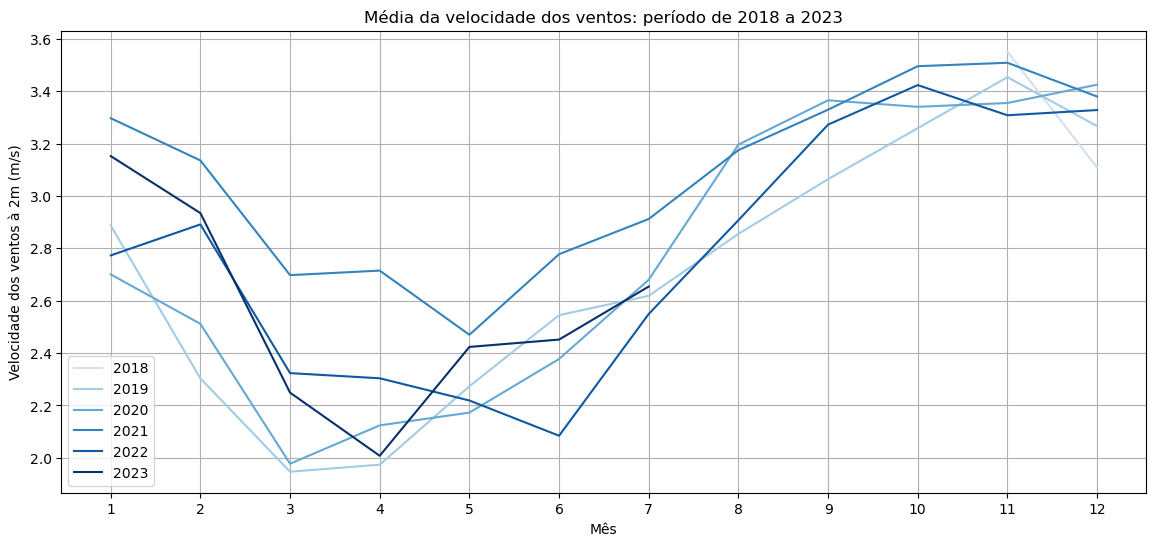

In [46]:
# grafico

cores_azul = plt.cm.Blues(np.linspace(0.2, 1, len(df_media_ventos['Ano'].unique())))

plt.figure(figsize=(14, 6))
for i, ano in enumerate(df_media_ventos['Ano'].unique()):
    df_ano = df_media_ventos[df_media_ventos['Ano'] == ano]
    plt.plot(df_ano["Mês"], df_ano['Velocidade do vento à 2m (m/s)'], label=str(ano), color=cores_azul[i])

plt.xlabel('Mês')
plt.ylabel('Velocidade dos ventos à 2m (m/s)')
plt.title('Média da velocidade dos ventos: período de 2018 a 2023')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()

# plt.savefig('galinhos.png', dpi=300, bbox_inches='tight')
plt.show()